### K Nearest Neighbors (KNN)

![](https://www.codehub.gr/wp-content/uploads/2018/01/cropped-CodeHub-logo_320x132.png)

In [22]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score

import matplotlib.pyplot as plt

np.set_printoptions(precision=3)
pd.set_option('precision', 3)
%matplotlib inline

In [23]:
# load
df = pd.read_csv("carbi.data.csv")

In [50]:
df.dtypes

cylinders          int64
displayments     float64
horsepower       float64
weight             int64
acceleration     float64
model year         int64
cluster            int64
mpg              float64
origin_1           int64
origin_2           int64
origin_3           int64
origin             int64
car name          object
brand             object
mpg_scaled       float64
cylinders_str      int64
origin_str         int64
dtype: object

In [25]:
df.shape

(398, 18)

In [26]:
df = df.iloc[: , 1:]

In [42]:
def knn_cluster(source,target):


    if len(source.values.shape)==1:
        X = source.values.reshape(-1,1)
    
    else:
        X = source.values 
    

    y = target.values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = KNeighborsClassifier()
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test) 
    
    print('Score KNN', model.score(X_train, y_train))

   # print('R2 = ', r2_score(y_test,pred_test),'Μάλλον λάθος εδώ')

   # fit/score with different number of neighbors


In [43]:
knn_cluster(df[['weight','horsepower','displayments','cylinders','origin','acceleration']],df['cluster'])

Score KNN 0.9716981132075472


In [48]:
def knn_k(source,target):


    if len(source.values.shape)==1:
        X = source.values.reshape(-1,1)
    
    else:
        X = source.values 
    

    y = target.values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # fit/score with different number of neighbors
    for k in range(1, 20):
            knn = KNeighborsClassifier(n_neighbors=k) # 11
            knn.fit(X_train, y_train)  
            print(f'{k} --> {knn.score(X_test, y_test)}')
    knn_accuracies=[]

    for k in range(1, 20):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)  
        knn_accuracies.append(accuracy_score(y_test, knn.predict(X_test)))    
        
    fig = plt.figure(figsize=(7, 5))

    ax = plt.subplot(111)
    ax.plot(range(1, 20, 1), knn_accuracies)

    # aesthetic parameters
    ax.set_xticks(range(1, 20))
    ax.set_xlabel('$k$')
    ax.set_ylabel('accuracy')

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    ax.set_title('kNN accuracy on different values of k')

    print(f'Best accuracy {max(knn_accuracies) * 100:.2f}% for k={list(range(1, 20))[np.argmax(knn_accuracies)]}')

1 --> 0.9375
2 --> 0.925
3 --> 0.9375
4 --> 0.9125
5 --> 0.9
6 --> 0.9
7 --> 0.8875
8 --> 0.875
9 --> 0.875
10 --> 0.875
11 --> 0.875
12 --> 0.875
13 --> 0.875
14 --> 0.875
15 --> 0.875
16 --> 0.875
17 --> 0.875
18 --> 0.875
19 --> 0.875
Best accuracy 93.75% for k=1


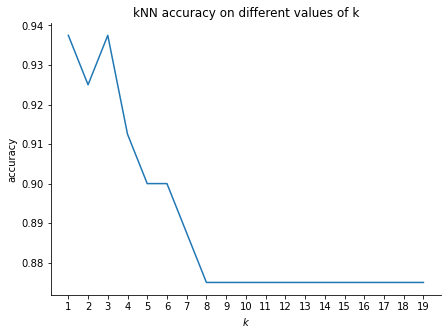

In [49]:
knn_k(df[['weight','horsepower','displayments','cylinders','origin','acceleration']],df['cluster'])